In [1]:
from Methods_windowing_fix import *

In [2]:
win = Windowing(aggCurves)
win.set_points([16,   23,   32,   45,   64,   91,  128,  181,  256,  362,  512,
        724, 1024, 1448, 2048, 2896])

,Count
size_train,
16,245
23,246
32,246
40,1
45,244
...,...
1048576,2
1482910,1
1486391,1


In [3]:
win.MDS()
win.MMF()
win.Last()

C:\Users\lkiel\PycharmProjects\AMLthesis\MainFiles\Methods_windowing_fix.py:225: UserWarning: Given curve has no value at target point. Predictions can still be made and shown but are not used in the error calculations.
  warnings.warn("Given curve has no value at target point. Predictions can still be made and shown "


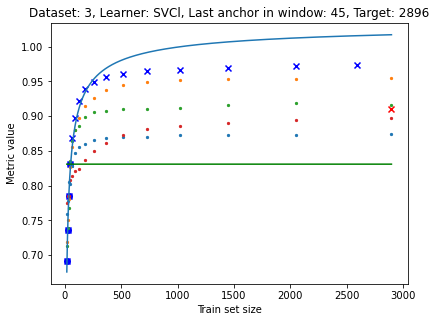

In [4]:
win.PlotCurveAndPrediction(0,0,3,14, legend = False)

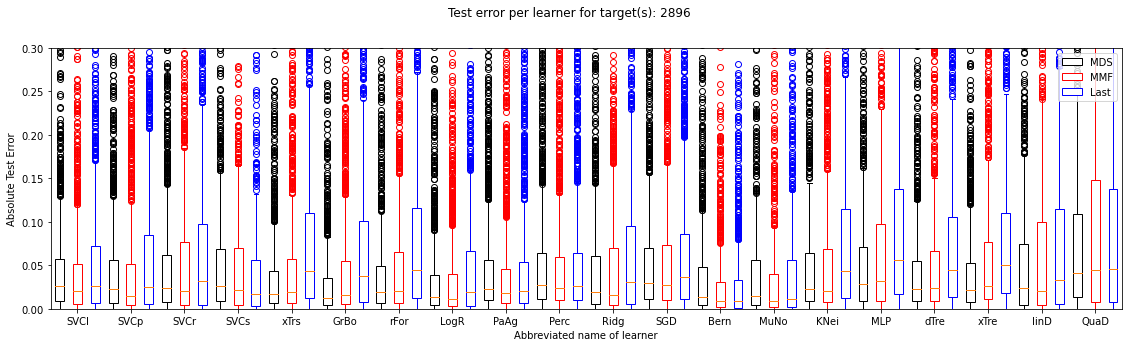

In [6]:
win.Boxplots(target = -1, ylim = [0,0.3], xaxis = 'learner')

In [6]:
win.help()

This class is used to analyse the results of different learning curve regression methods.
The results are stored in a dictionary called 'results'. To access them use the following syntax: self.results['method']['test error'][datasetID, learnerID, windowID, targetID]
To plot the results of a specific method, use the following functions: 

PlotCurveAndPrediction: plots the predictions and true values for a specific dataset, learner, window and target. This gives a zoomed in view of what is happening.

Boxplots: Given a specific slice of the dataset, learner, window and target, this function makes the corresponding boxplots. You can specify what you want to plot the boxplots over, by setting the xaxis parameter to 'dataset', 'learner', 'window' or 'target'.

